In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from rvi_sampling.utils.stochastic_processes import create_SIR, ArbitriaryPrior, SIRParameters
import numpy as np
from collections import namedtuple
import torch.nn as nn
import torch
from rvi_sampling.stochastic_processes.base import PyTorchWrap
from rvi_sampling.samplers import RVISampler
from pg_methods.networks import MLP_factory
from pg_methods.policies import MultinomialPolicy
from pg_methods.baselines import MovingAverageBaseline
from pg_methods.objectives import PolicyGradientObjective
A = namedtuple('bla', 'sir_seed')
import seaborn as sns
sns.set_style('whitegrid')

In [36]:
prior = ArbitriaryPrior(np.array([[98, 2], [99, 1], [97, 3], [96, 4], [95, 5]]))
process_parameters = SIRParameters(100, 10, 0.9, 200, 0.01)
fake_argparser = A(0)
sir, _ = create_SIR(fake_argparser, sir_params=process_parameters, n_agents=1, prior=prior)

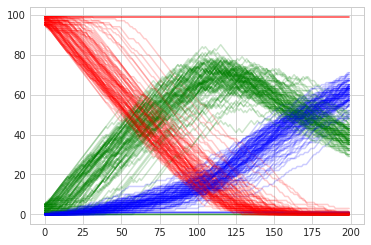

In [37]:
for i in range(100):
    trajectory = sir.simulate()
    plt.plot(trajectory[:, 0], label='Susceptibles', color='r', alpha=0.2)
    plt.plot(trajectory[:, 1], label='infecteds', color='g', alpha=0.2)
    plt.plot(sir.population_size - trajectory[:, 0] - trajectory[:, 1], label='recoveries', color='b', alpha=0.2)


In [39]:
sir.xT

array([ 0, 39])

In [40]:
# create a policy for the RVI sampler
fn_approximator = MLP_factory(sir.state_space+int(1),
                              hidden_sizes=[16, 16],
                              output_size=sir.action_space,
                              hidden_non_linearity=nn.ReLU)

policy = MultinomialPolicy(fn_approximator)
policy_optimizer = torch.optim.RMSprop(fn_approximator.parameters(),lr=0.001)
baseline = MovingAverageBaseline(0.99)
rvi =  RVISampler(policy,
                  policy_optimizer,
                  baseline=baseline,
                  objective=PolicyGradientObjective(entropy=10, time_mean=False),
                  feed_time=True,
                  seed=0)

In [41]:
results = rvi.solve(PyTorchWrap(sir), 10000, verbose=True)

/home/ml/zahmed8/dev/better-sampling/rvi_sampling/stochastic_processes/epidemiology.py:187: RuntimeWarning: divide by zero encountered in log
  step_log_probs += np.log(self.prior.pdf(self.x_agent))


MC Sample 0, loss -14647.3, episode_reward -100085, trajectory_length 200, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -0.14639398804865777
MC Sample 100, loss -1038.63, episode_reward -100027, trajectory_length 175, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -116.3187363743782


/home/ml/zahmed8/dev/better-sampling/rvi_sampling/stochastic_processes/epidemiology.py:183: RuntimeWarning: divide by zero encountered in log
  step_log_probs = np.log(step_probs)


MC Sample 200, loss -615.257, episode_reward -100013, trajectory_length 104, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -79.9695360660553
MC Sample 300, loss -562.84, episode_reward -100004, trajectory_length 110, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -74.52842420339584
MC Sample 400, loss -2038.13, episode_reward -100055, trajectory_length 200, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -107.84016001224518
MC Sample 500, loss 380.959, episode_reward -100001, trajectory_length 92, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -57.99322512745857
MC Sample 600, loss -1105.05, episode_reward -100032, trajectory_length 141, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -96.45851385593414
MC Sample 700, loss -4440.06, episode_reward -100052, trajectory_length 200, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -115.00517377257347
MC Sample 800, loss -156.922, episode_reward -100011, trajectory_l

MC Sample 5500, loss 44.4595, episode_reward -100012, trajectory_length 118, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -82.05319517850876
MC Sample 5600, loss -1004.98, episode_reward -100026, trajectory_length 155, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -107.87271344661713
MC Sample 5700, loss -1125.29, episode_reward -100020, trajectory_length 134, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -92.55154466629028
MC Sample 5800, loss -282.585, episode_reward -100022, trajectory_length 133, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -92.99249416589737
MC Sample 5900, loss -40.7343, episode_reward -100001, trajectory_length 96, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -65.40777188539505
MC Sample 6000, loss -198.561, episode_reward -100002, trajectory_length 95, successful trajs 0, path_log_prob: -inf, proposal_log_prob: -62.84802907705307
MC Sample 6100, loss -427.448, episode_reward -100010, traje

In [18]:
#[traj[0] for traj in results.all_trajectories()]

In [23]:
# results.plot_trajectory_evolution(dimension=0)
# results.plot_trajectory_evolution(dimension=1)

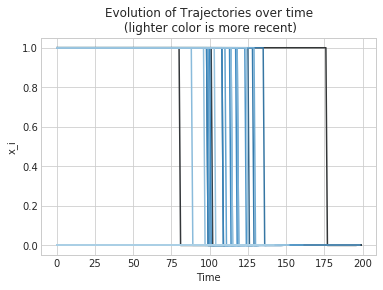

In [42]:
results.plot_all_trajectory_evolution(dimension=0)

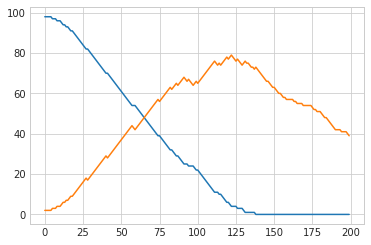

In [38]:
plt.plot(sir.true_trajectory)

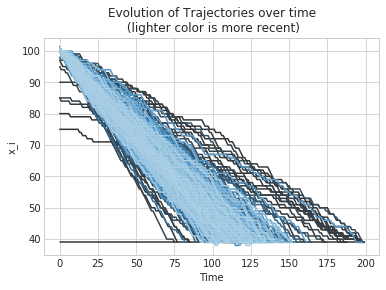

In [44]:
results.plot_all_trajectory_evolution(dimension=1)

In [ ]:
plt.plot(results.rewards_per_episode)
plt.ylim(-400)